In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [11]:
df = pd.read_csv('dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cam on
1,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cam on
2,0.623168,0.905702,-7.300501e-08,0.663644,0.828575,0.006572,0.680710,0.737935,-0.006984,0.655962,...,0.547286,0.650144,-0.094316,0.533989,0.600830,-0.092361,0.526572,0.557138,-0.090015,Cam on
3,0.399361,0.849483,7.682796e-07,0.364899,0.777947,-0.005233,0.359609,0.688680,-0.018972,0.390810,...,0.474884,0.623693,-0.074852,0.494359,0.575226,-0.073745,0.508723,0.535010,-0.071621,Cam on
4,0.623927,0.852907,-2.515635e-07,0.655674,0.765124,0.017205,0.667421,0.678854,0.009531,0.646877,...,0.553001,0.597433,-0.079397,0.536442,0.551406,-0.073455,0.526492,0.512578,-0.068813,Cam on
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,0.611677,0.871558,1.195689e-07,0.673554,0.811659,-0.016980,0.728097,0.742066,-0.037416,0.770032,...,0.514796,0.689248,-0.116514,0.505639,0.644384,-0.125861,0.496539,0.597850,-0.132956,Xin loi
695,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Xin loi
696,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Xin loi
697,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Xin loi


In [12]:
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cam on
1,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cam on
2,0.623168,0.905702,-7.300501e-08,0.663644,0.828575,0.006572,0.680710,0.737935,-0.006984,0.655962,...,0.547286,0.650144,-0.094316,0.533989,0.600830,-0.092361,0.526572,0.557138,-0.090015,Cam on
3,0.399361,0.849483,7.682796e-07,0.364899,0.777947,-0.005233,0.359609,0.688680,-0.018972,0.390810,...,0.474884,0.623693,-0.074852,0.494359,0.575226,-0.073745,0.508723,0.535010,-0.071621,Cam on
4,0.623927,0.852907,-2.515635e-07,0.655674,0.765124,0.017205,0.667421,0.678854,0.009531,0.646877,...,0.553001,0.597433,-0.079397,0.536442,0.551406,-0.073455,0.526492,0.512578,-0.068813,Cam on
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,0.611677,0.871558,1.195689e-07,0.673554,0.811659,-0.016980,0.728097,0.742066,-0.037416,0.770032,...,0.514796,0.689248,-0.116514,0.505639,0.644384,-0.125861,0.496539,0.597850,-0.132956,Xin loi
695,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Xin loi
696,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Xin loi
697,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Xin loi


In [13]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (699, 63)
Labels shape = (699,)


In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

In [15]:
y_pred = svm.predict(x_test)
y_pred

array(['Xin chao', 'Xin chao', 'Dong y', 'Khong thich', 'Hen gap lai',
       'Hen gap lai', 'Hen gap lai', 'Khong thich', 'Thich', 'Dong y',
       'Cam on', 'Dong y', 'Thich', 'Dong y', 'Thich', 'Thich',
       'Hen gap lai', 'Hen gap lai', 'Xin chao', 'Thich', 'Cam on',
       'Dong y', 'Cam on', 'Hen gap lai', 'Hen gap lai', 'Dong y',
       'Hen gap lai', 'Khong thich', 'Hen gap lai', 'Khong thich',
       'Hen gap lai', 'Dong y', 'Khong thich', 'Hen gap lai', 'Xin loi',
       'Hen gap lai', 'Cam on', 'Xin loi', 'Dong y', 'Khong thich',
       'Hen gap lai', 'Cam on', 'Cam on', 'Hen gap lai', 'Hen gap lai',
       'Xin loi', 'Dong y', 'Hen gap lai', 'Xin chao', 'Dong y', 'Cam on',
       'Hen gap lai', 'Hen gap lai', 'Dong y', 'Dong y', 'Xin chao',
       'Hen gap lai', 'Xin loi', 'Hen gap lai', 'Cam on', 'Hen gap lai',
       'Hen gap lai', 'Hen gap lai', 'Dong y', 'Dong y', 'Thich',
       'Xin chao', 'Hen gap lai', 'Hen gap lai', 'Hen gap lai',
       'Xin chao', 'Khong thich'

In [16]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(0.6928571428571428, 0.6928571428571428, 0.6928571428571428)

<AxesSubplot:title={'center':'Confusion Matrix - American Sign Language'}>

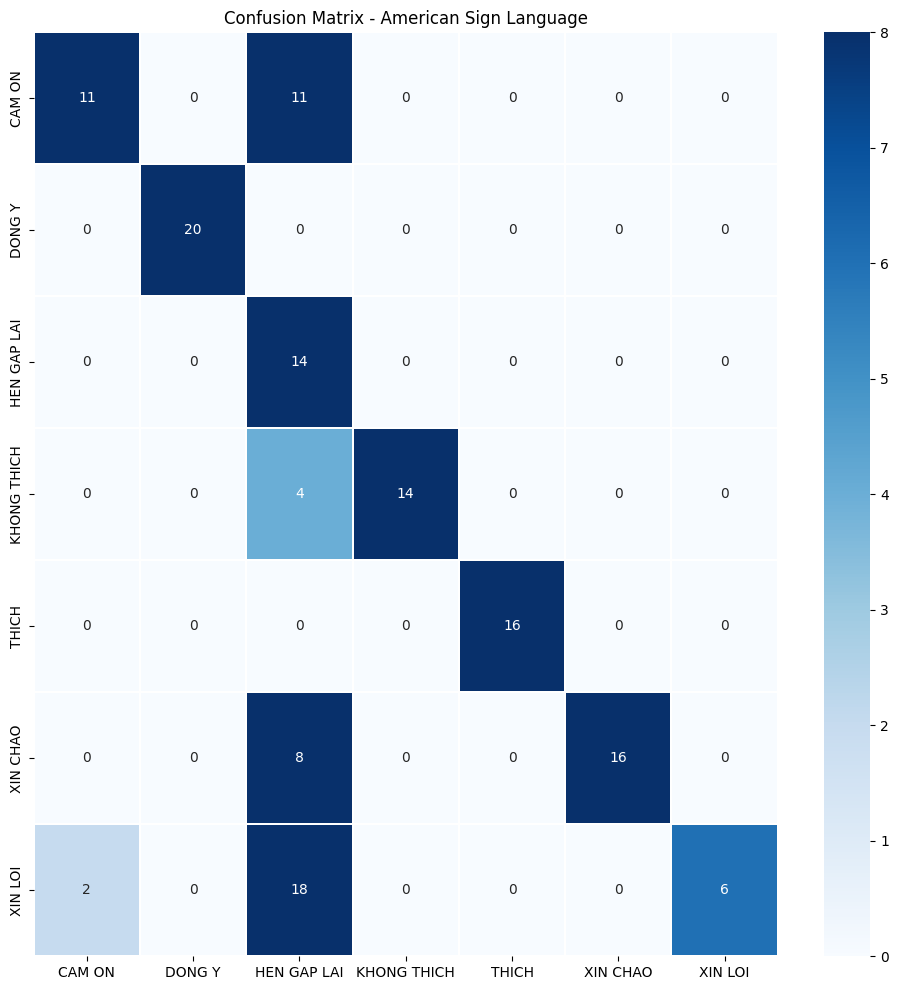

In [17]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - American Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [18]:
import pickle

# save model
with open('model.pkl','wb') as f:
    pickle.dump(svm,f)